In [1]:
import sys
# !{sys.executable} -m pip install spacy
# !{sys.executable} -m pip install pyldavis
# !{sys.executable} -m spacy download en
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install biopython
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install tensorflow
# !{sys.executable} -m pip install imblearn
# !{sys.executable} -m pip install sklearn
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install xgboost
# !{sys.executable} -m pip install pyod
# !{sys.executable} -m pip install lightgbm
# !{sys.executable} -m pip install catboost 
# !{sys.executable} -m pip install plotly
# !{sys.executable} -m pip install cufflinks
# !{sys.executable} -m pip install pyclustering
# !{sys.executable} -m pip install beautifulsoup4
# !{sys.executable} -m pip install algorithmia
# !{sys.executable} -m pip install paramiko
# !{sys.executable} -m pip install gensim==3.8.3

In [2]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim import models
from gensim.models import LdaModel, CoherenceModel
from gensim.models.wrappers import LdaMallet
import pprint

# spacy for lemmatization
import spacy
from spacy.lang.en import English

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#reviews_datasets=pd.read_csv('D:/so-data/flutter-posts.csv'  )
reviews_datasets=pd.read_excel('D:/so-data/framework-related-posts-september/flutter.xlsx'  )
# reviews_datasets=reviews_datasets.head(1000)
# postTagsRawData = pd.read_csv('PostTagsV3.csv', chunksize=1000)
# postTagsRawData = pd.read_excel('PostsTags2.xlsx')
print(reviews_datasets.head(20))

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


          Id  AcceptedAnswerId  AnswerCount  \
0   24208213          24208259            2   
1   33622063          33631294            4   
2   19243506          19249568            7   
3   33683162          33688068            1   
4   38585483          38817862            1   
5   13579982          13580222            3   
6   37796913          37898183            2   
7   40579879          40595157           15   
8   21521729          21613700            7   
9   41112229          41113079            1   
10  13264230          13264231            6   
11  25131100          25131121            1   
12  40877624          40877990            2   
13  41153610          41172864            4   
14  41091772          41095350            3   
15  41848853          41856568            1   
16  41845693          41846093            2   
17  41727553          41728135            1   
18  41152320          41153547            3   
19  41729278          41815123            2   

            

In [4]:
reviews_datasets.dropna()

# obody = reviews_datasets['Body']

# changed to append both title and body
reviews_datasets['CombinedTitleBody'] = reviews_datasets['Title']+' '+reviews_datasets['Body']
#reviews_datasets['CombinedTitleBody'] = reviews_datasets['Combined']
obody = reviews_datasets['CombinedTitleBody']

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
reviews_datasets.head()
#print(obody)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,LastEditDate,...,Title,ViewCount,Answer,AnswerDate,AnswerDiff,Combined,AcceptedAnswerCount,CombinedTitleBody,topics,obody
Id,,,,,,,,,,,,,,,,,,,,,
7546412,7546460,3,"<p>I've read <a href=""https://gist.github.com/...",NaN,2,NaN,2011-09-25 15:16:11.123,1,2013-04-27 03:27:57.863,2013-04-27 03:27:57.863,...,How can Google's Dart get better performance?,3360,"<p>One example is <a href=""http://en.wikipedia...",2011-09-25 15:24:01.120,470.0,How can Google's Dart get better performance? ...,1,How can Google's Dart get better performance?,"[google, dart, get, well, performance, ve, rea...",How can Google's Dart get better performance? ...
7818138,7818152,1,<p>I'm trying to build Dart on Windows XP (acc...,NaN,0,NaN,2011-10-19 07:50:54.907,0,2011-10-19 11:48:08.637,2011-10-19 11:48:08.637,...,Python error on building Dart on Windows,163,<p>Python 3 removes the <code>print</code> key...,2011-10-19 07:52:37.587,103.0,Python error on building Dart on Windows <p>I'...,1,Python error on building Dart on Windows,"[python, error, build, dart, window, m, try, b...",Python error on building Dart on Windows <p>I'...
7732962,7825428,4,<p>How can I run a Dart application? Do I need...,NaN,0,NaN,2011-10-11 21:50:30.927,1,2018-07-02 08:22:13.587,2011-10-18 22:20:02.017,...,Where can I find the interpreter/compiler of D...,2933,<p>You can download Dart binaries for Windows ...,2011-10-19 17:28:20.577,675470.0,Where can I find the interpreter/compiler of D...,1,Where can I find the interpreter/compiler of D...,"[find, interpreter, compiler, dart, language, ...",Where can I find the interpreter/compiler of D...
7717804,7717989,3,"<p>Google is launching a new language, promisi...",NaN,0,NaN,2011-10-10 19:42:51.963,0,2013-04-27 03:49:47.003,2011-10-11 14:34:26.137,...,How can I evaluate Dart performance?,1368,<p>Google promises better performance <em>late...,2011-10-10 20:00:32.433,1061.0,How can I evaluate Dart performance? <p>Google...,1,How can I evaluate Dart performance?,"[evaluate, dart, performance, google, launch, ...",How can I evaluate Dart performance? <p>Google...
7715537,7717514,2,"<p>Dart, Google's new web language, says it su...",NaN,3,NaN,2011-10-10 16:00:37.447,2,2013-04-27 03:43:10.503,NaN,...,What does Dart's output look like?,2687,"<pre><code>main() {\n print('Hello, Dart!...",2011-10-10 19:17:52.437,11835.0,"What does Dart's output look like? <p>Dart, Go...",1,What does Dart's output look like?,"[dart, output, look, dart, google, new, web, l...","What does Dart's output look like? <p>Dart, Go..."


In [5]:
from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk

import re
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup

tokenizer = ToktokTokenizer()
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))
stop_words.update(['.',',','"',"'",'?','!',':', ";",', ',',  ',',   ', '(',')','[',']','{','}','#','...','--',"'s",'also',
                      '&','-','--','=','known','mi','km','$',"'",'`'])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
def transform_text(text): 

    soup = BeautifulSoup(text)
    for elm in soup.find_all():
        if '<code>'== str(elm)[0:6]:
            elm.decompose()
    textStr = str(soup.get_text())
    textStr = textStr.replace('<html>','')
    textStr = textStr.replace('</html>','')
    textStr = textStr.replace('<body>','')
    textStr = textStr.replace('</body>','')
    textStr = textStr.replace('<p>','')
    textStr = textStr.replace('</p>','')
    textStr = textStr.replace('<pre>','')
    textStr = textStr.replace('</pre>','')
    
    #     remove lines
    textStr = textStr.strip()
    # remove numbers
    textStr = re.sub(r"\d","", textStr)
    
    return textStr

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
print(transform_text('<p>hello there I will kill you. Then I will be playing cricket <code>I am inside code</code> </p>134'))

hello there I will kill you. Then I will be playing cricket  


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
import re

# Convert to list
data = reviews_datasets.CombinedTitleBody.values.tolist()

# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
data = [transform_text(sent) for sent in data]

# Remove distracting single and double quotes
data = [re.sub("\'", "", sent) for sent in data]
data = [re.sub('\", "', '', sent) for sent in data]
data = [re.sub('\\"', '', sent) for sent in data]
data = [re.sub('\"', '', sent) for sent in data]
data = [re.sub('[\\:"]', '', sent) for sent in data]

# Remove web links
data = [re.sub(r'^https?:\/\/.*[\r\n]*', '', sent) for sent in data]

print(data[:3])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['How to exclude debug code Lets say I have simple logger  I want this code to run in the dev mode (VM checked mode) but i dont want it in my production code. And i want it to be tree shaked away with the dartjs compiler. Is there some standard way?', 'Flutter fails on `flutter` command Im following the Getting Started with Flutter guide and getting stuck when running the actual  command', 'Native mobile application using google dart language How to develop a native mobile applications for android using dart language ? Is it possible?']


In [8]:
# Tokenize words and text clean up
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:3])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['how', 'to', 'exclude', 'debug', 'code', 'lets', 'say', 'have', 'simple', 'logger', 'want', 'this', 'code', 'to', 'run', 'in', 'the', 'dev', 'mode', 'vm', 'checked', 'mode', 'but', 'dont', 'want', 'it', 'in', 'my', 'production', 'code', 'and', 'want', 'it', 'to', 'be', 'tree', 'shaked', 'away', 'with', 'the', 'dartjs', 'compiler', 'is', 'there', 'some', 'standard', 'way'], ['flutter', 'fails', 'on', 'flutter', 'command', 'im', 'following', 'the', 'getting', 'started', 'with', 'flutter', 'guide', 'and', 'getting', 'stuck', 'when', 'running', 'the', 'actual', 'command'], ['native', 'mobile', 'application', 'using', 'google', 'dart', 'language', 'how', 'to', 'develop', 'native', 'mobile', 'applications', 'for', 'android', 'using', 'dart', 'language', 'is', 'it', 'possible']]


In [9]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=75) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=75)  


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[3]]])

['how', 'can', 'evaluate', 'dart', 'performance', 'google', 'is', 'launching', 'new', 'language', 'promising', 'that', 'it', 'has', 'better', 'performance', 'but', 'how', 'can', 'evaluate', 'performance', 'in', 'dart', 'source', 'code', 'lets', 'take', 'as', 'example', 'the', 'sun', 'flower', 'drawframe', 'method', 'if', 'we', 'have', 'lots', 'of', 'could', 'we', 'add', 'statement', 'to', 'evaluate', 'elapsed', 'time', 'within', 'google', 'promises', 'better', 'performance', 'later', 'on', 'when', 'there', 'is', 'native', 'dart', 'in', 'the', 'browser', 'for', 'now', 'dart', 'compiles', 'directly', 'to', 'javascript', 'and', 'is', 'larger', 'and', 'slower', 'than', 'writing', 'pure', 'javascript', 'the', 'function', 'you', 'have', 'right', 'there', 'is', 'actually', 'identical', 'in', 'pure', 'javascript', 'so', 'the', 'runtime', 'ought', 'to', 'be', 'very', 'nearly', 'the', 'same', 'between', 'compiled', 'dart', 'and', 'direct', 'javascript', 'version', 'you', 'could', 'compare', 'the

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
spacy.load('en_core_web_sm')

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
#spacy.load('en_core_web_sm')

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
reviews_datasets.head(20)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,LastEditDate,...,Score,Tags,Title,ViewCount,Answer,AnswerDate,AnswerDiff,Combined,AcceptedAnswerCount,CombinedTitleBody
Id,,,,,,,,,,,,,,,,,,,,,
7546412,7546460,3,"<p>I've read <a href=""https://gist.github.com/...",NaN,2,NaN,2011-09-25 15:16:11.123,1,2013-04-27 03:27:57.863,2013-04-27 03:27:57.863,...,7,<javascript><performance><dart>,How can Google's Dart get better performance?,3360,"<p>One example is <a href=""http://en.wikipedia...",2011-09-25 15:24:01.120,470.0,How can Google's Dart get better performance? ...,1,How can Google's Dart get better performance? ...
7818138,7818152,1,<p>I'm trying to build Dart on Windows XP (acc...,NaN,0,NaN,2011-10-19 07:50:54.907,0,2011-10-19 11:48:08.637,2011-10-19 11:48:08.637,...,1,<python><windows><dart>,Python error on building Dart on Windows,163,<p>Python 3 removes the <code>print</code> key...,2011-10-19 07:52:37.587,103.0,Python error on building Dart on Windows <p>I'...,1,Python error on building Dart on Windows <p>I'...
7732962,7825428,4,<p>How can I run a Dart application? Do I need...,NaN,0,NaN,2011-10-11 21:50:30.927,1,2018-07-02 08:22:13.587,2011-10-18 22:20:02.017,...,6,<windows><dart>,Where can I find the interpreter/compiler of D...,2933,<p>You can download Dart binaries for Windows ...,2011-10-19 17:28:20.577,675470.0,Where can I find the interpreter/compiler of D...,1,Where can I find the interpreter/compiler of D...
7717804,7717989,3,"<p>Google is launching a new language, promisi...",NaN,0,NaN,2011-10-10 19:42:51.963,0,2013-04-27 03:49:47.003,2011-10-11 14:34:26.137,...,7,<performance><web><performance-testing><dart>,How can I evaluate Dart performance?,1368,<p>Google promises better performance <em>late...,2011-10-10 20:00:32.433,1061.0,How can I evaluate Dart performance? <p>Google...,1,How can I evaluate Dart performance? <p>Google...
7715537,7717514,2,"<p>Dart, Google's new web language, says it su...",NaN,3,NaN,2011-10-10 16:00:37.447,2,2013-04-27 03:43:10.503,NaN,...,33,<javascript><dart>,What does Dart's output look like?,2687,"<pre><code>main() {\n print('Hello, Dart!...",2011-10-10 19:17:52.437,11835.0,"What does Dart's output look like? <p>Dart, Go...",1,"What does Dart's output look like? <p>Dart, Go..."
7722583,7722620,2,<p>I am having a hard time understanding what ...,2011-10-12 01:13:33.767,2,NaN,2011-10-11 07:19:21.543,5,2013-04-15 19:41:49.047,2013-04-15 19:41:49.047,...,21,<dart>,What is the role of Google's Dart programming ...,3830,<p>You may checkout the technical aspects on <...,2011-10-11 07:22:05.483,164.0,What is the role of Google's Dart programming ...,1,What is the role of Google's Dart programming ...
7722867,7723239,2,<blockquote>\n <p><strong>Notice:</strong> Th...,NaN,4,NaN,2011-10-11 07:47:57.973,3,2014-02-18 00:49:27.573,2014-02-18 00:49:27.573,...,12,<interface><dart>,Why can Dart's built-in List interface be inst...,1039,<p>The syntax for defining an interface is:</p...,2011-10-11 08:27:48.873,2391.0,Why can Dart's built-in List interface be inst...,1,Why can Dart's built-in List interface be inst...
7712107,7712138,2,"<p>I don't see the point of <a href=""http://ww...",2012-08-30 14:41:38.983,3,NaN,2011-10-10 11:28:28.783,7,2015-10-29 21:53:31.640,2012-12-27 19:35:12.373,...,49,<javascript><node.js><dart>,What is the benefit of the Dart language over ...,10329,"<p>The <a href=""http://www.dartlang.org/docs/t...",2011-10-10 11:32:06.053,218.0,What is the benefit of the Dart language over ...,1,What is the benefit of the Dart language over ...
7724136,7724281,2,<p>Will I get replacement of <strong>node.js</...,2011-10-11 11:03:28.730,2,NaN,2011-10-11 09:46:44.253,2,2019-06-29 16:49:24.597,2019-06-29 16:49:24.597,...,9,<javascript><node.js><dart>,Comparison of Javascript with Google Dart,6899,"<p>You can read about Dart at <a href=""http://...",2011-10-11 09:59:45.297,781.0,Comparison of Javascript with Google Dart 

In [13]:
print(data_lemmatized[:2])

reviews_datasets['topics']=data_lemmatized
reviews_datasets['obody']=obody
cview = reviews_datasets['ViewCount'].astype(int)
avgfav = reviews_datasets['FavoriteCount'].astype(int)
avgscore = reviews_datasets['Score'].astype(int)
body = reviews_datasets['Body']
titles = reviews_datasets['Title']
answers = reviews_datasets['Answer']
caccepans = reviews_datasets['AcceptedAnswerCount']
ansdelay = reviews_datasets['AnswerDiff']
avgdelay = ansdelay.fillna(0)
reviews_datasets.head(20)
#reset option to default value

[['exclude', 'debug', 'code', 'simple', 'logger', 'want', 'code', 'run', 'dev', 'mode', 'check', 'mode', 'do', 'want', 'production', 'code', 'want', 'tree', 'shake', 'dartj', 'compiler', 'standard', 'way'], ['flutter', 'fail', 'flutter', 'command', 'm', 'follow', 'get', 'start', 'flutter', 'guide', 'get', 'stuck', 'run', 'actual', 'command']]


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,...,ViewCount,post_id,Answer,AnswerDate,AnswerDiff,Combined,AcceptedAnswerCount,CombinedTitleBody,topics,obody
0,24208213,24208259,2,<p>Let's say I have simple logger:</p>\n\n\n\n...,NaN,0,NaN,2014-06-13 14:50:23.590,0,2019-03-19 12:23:50.160,...,506,24208213,<p>You could embed the code in an <code>assert...,2014-06-13 14:52:36.013,133.0,How to exclude debug code <p>Let's say I have ...,1,How to exclude debug code <p>Let's say I have ...,"[exclude, debug, code, simple, logger, want, c...",How to exclude debug code <p>Let's say I have ...
1,33622063,33631294,4,"<p>I'm following the <a href=""http://flutter.i...",NaN,0,NaN,2015-11-10 02:52:24.717,1,2020-03-25 21:58:27.000,...,3451,33622063,<p>Looks like your Dart version is outdated <c...,2015-11-10 13:36:43.130,38659.0,Flutter fails on `flutter` command <p>I'm foll...,1,Flutter fails on `flutter` command <p>I'm foll...,"[flutter, fail, flutter, command, m, follow, g...",Flutter fails on `flutter` command <p>I'm foll...
2,19243506,19249568,7,<p>How to develop a native mobile applications...,NaN,0,NaN,2013-10-08 09:09:28.027,2,2020-09-28 08:05:03.097,...,6396,19243506,<p>Yes this is possible. A Dart application ca...,2013-10-08 13:50:18.427,16850.0,Native mobile application using google dart la...,1,Native mobile application using google dart la...,"[native, mobile, application, use, dart, langu...",Native mobile application using google dart la...
3,33683162,33688068,1,<p>I am trying to build a Flutter app that use...,NaN,1,NaN,2015-11-12 23:10:05.670,2,2020-08-23 20:18:07.517,...,3713,33683162,<p>You can trigger a navigation using the acti...,2015-11-13 07:58:54.773,31729.0,How to navigate to a web page from within a fl...,1,How to navigate to a web page from within a fl...,"[navigate, web, page, flutter, app, oauth, try...",How to navigate to a web page from within a fl...
4,38585483,38817862,1,<p>I just started to use Atom as editor for Da...,NaN,3,NaN,2016-07-26 09:03:22.517,1,2017-08-25 20:54:35.343,...,420,38585483,<p>Most Dart IDE integrations (including this ...,2016-08-07 19:42:42.637,1075160.0,Can I customize the code formatting of Dart co...,1,Can I customize the code formatting of Dart co...,"[customize, code, format, dart, code, atom, st...",Can I customize the code formatting of Dart co...
5,13579982,13580222,3,<p>I have written this code to test how custom...,NaN,2,NaN,2012-11-27 08:21:36.137,3,2021-01-23 03:04:34.427,...,24979,13579982,"<p>You can look at the <a href=""http://www.dar...",2012-11-27 08:38:22.703,1006.0,How to create a custom exception and handle it...,1,How to create a custom exception and handle it...,"[create, custom, exception, handle, dart, writ...",How to create a custom exception and handle it...
6,37796913,37898183,2,"<p>I made a simple example with an input text,...",NaN,0,NaN,2016-06-13 18:38:13.847,0,2019-08-16 06:26:06.293,...,7294,37796913,<p>As far as I understand the problem is that ...,2016-06-18 14:41:25.113,417792.0,Flutter: input text field don't work properly ...,1,Flutter: input text field don't work properly ...,"[flutter, input, text, field, do, work, proper...",Flutter: input text field don't work properly ...
7,40579879,40595157,15,<p>I want to display a <strong>simple SnackBar...,NaN,4,NaN,2016-11-13 23:15:45.803,13,2020-11-20 10:12:10.467,...,81495,40579879,<p>There's three problems. The first is that y...,2016-11-14 18:11:47.820,68162.0,Display SnackBar in Flutter <p>I want to displ...,1,Display SnackBar in Flutter <p>I want to displ...,"[display, snackbar, flutter, want, display, si...",Display SnackBar in Flutter <p>I want to displ...
8,21521729,21613700,7,"<p>I have a String, and I would like to revers...",NaN,2,NaN,2014-02-03 07:18:35.167,6,2020-11-05 05:05:54.820,...,14104,21521729,<p>The question is not well defined. Reversing...,2014-02-06 20:46:37.480,307682.0,How do I reverse a String in D

In [25]:
reviews_datasets.to_csv("D:/so-data/output1.csv")

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = 'D:\\so-data\\mallet-2.0.8\\mallet-2.0.8'

mallet_path = 'D:\\so-data\\mallet-2.0.8\\mallet-2.0.8\\bin\\mallet'

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=30, id2word=id2word, optimize_interval=10, iterations=1500)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# gensim.models.LdaModel?

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=15, step=5):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=5, limit=55, step=5)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5
10
15
20
25
30
35
40
45
50


In [25]:
print(coherence_values)
print()

[0.3634104764976521, 0.3883199794363248, 0.393328375905241, 0.38017801822197117, 0.37955038001419117, 0.37575013249293665, 0.38654508303048035, 0.379016477158579, 0.3864781406666399, 0.37923523957421923]


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


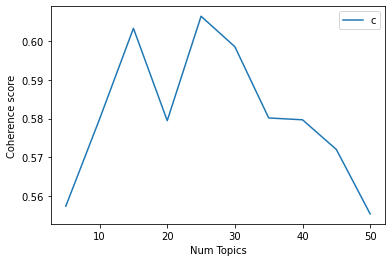

In [36]:
#Show graph
limit=55; start=5; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [36]:
print(coherence_values)

[0.5798416067489233, 0.5875305241265931, 0.5882034025575403, 0.5841272234244511, 0.5872427723579172, 0.5844846368207511, 0.5716639514856265, 0.5823317536964255, 0.5670567560417217, 0.5512539279478464]


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


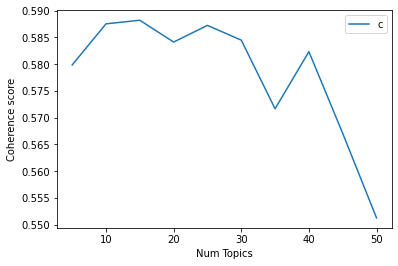

In [47]:
limit=5; start=55; step=5;
x = [5,10,15,20,25,30,35,40,45,50]
y = [0.5798416067489233, 0.5875305241265931, 0.5882034025575403, 0.5841272234244511, 0.5872427723579172, 0.5844846368207511, 0.5716639514856265, 0.5823317536964255, 0.5670567560417217, 0.5512539279478464]

plt.plot(x, y)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [17]:
def calculate_best_iterations(number_of_topics, number_of_iterations):
    print(number_of_iterations)
    lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus = corpus, num_topics= number_of_topics, id2word= id2word, iterations= number_of_iterations)
    coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    iterations.append(number_of_iterations)
    iteration_based_coherence_values.append(coherence_model_ldamallet.get_coherence())

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


500
1000
1500
2000
2500
3000


ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

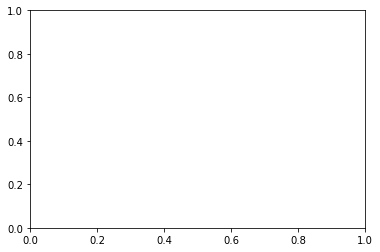

In [18]:
iterations = []
iteration_based_coherence_values = []

for i in [500,1000,1500,2000,2500, 3000]:
    calculate_best_iterations(25, i)

#Show graph
limit=3000; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, iteration_based_coherence_values)
plt.xlabel("Num of iterations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [19]:
for i in iteration_based_coherence_values:
    print(i)

0.5998438335445954
0.6023607420189429
0.5997274990445888
0.6043492908134893
0.5969203572637461
0.5962422240263926


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

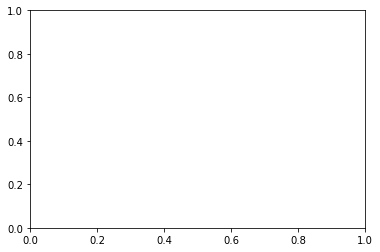

In [20]:
#Show graph
limit=3000; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, iteration_based_coherence_values)
plt.xlabel("Num of iterations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [20]:
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=25, id2word=id2word, iterations=2000, alpha=5)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
#print topics

#print(lda_mallet.show_topics(num_topics=-1, num_words=25, formatted=False))
topic_number = []
topics = []

for i in lda_mallet.show_topics(num_topics=50, num_words=10, formatted=False):
    value_map_keyword = {}
    value_list = []
    key_words_list = []
    for j in i[1]:
        value_map_keyword[j[1]] = j[0]
        value_list.append(j[1])
        key_words_list.append(j[0])
   
    topic_number.append(i[0]+1)
    topics.append(',  '.join(map(str, key_words_list)))
    
topic_dataframe = pd.DataFrame({'Topic-Number': topic_number, 'Keywords': topics})
topic_dataframe.to_excel("D:/so-data/final-data-september-framework/flutter_topic_keywords.xlsx")

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
###################################
# topic development
###################################

def format_topics_sentences(ldamodel=lda_mallet, corpus=corpus, texts=data_lemmatized, title=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    contents2 = pd.Series(title)
    contents3 = pd.Series(answers)
    sent_topics_df =  pd.concat([sent_topics_df, contents2, contents, contents3], axis=1)
    return(sent_topics_df)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_mallet, corpus=corpus, texts=body, title=titles)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords','Title','Body','Answer']

print(df_dominant_topic)
df_dominant_topic.to_excel("D:/so-data/final-data-september-framework/final_topics_with_flutter.xlsx")

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0                0            11.0              0.2792   
1                1            17.0              0.3516   
2                2             7.0              0.3255   
3                3             4.0              0.2662   
4                4            17.0              0.3737   
...            ...             ...                 ...   
78247        78247            10.0              0.2753   
78248        78248            13.0              0.4485   
78249        78249             8.0              0.4829   
78250        78250            10.0              0.2818   
78251        78251            18.0              0.4216   

                                                Keywords  \
0      app, flutter, io, build, file, release, projec...   
1      flutter, android, run, studio, version, projec...   
2      app, flutter, notification, message, android, ...   
3      user, firebase, app, login, log, flutter, sign...   
4  